In [1]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import numpy as np

In [2]:
#Load the train and test data
dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Project\\House Price Prediction\\train.csv')
dataset_test=pd.read_csv('C:\\Neville\\Python\\Session\\Project\\House Price Prediction\\test.csv')

In [4]:
#Check the shape of the datasets
print(dataset.shape,dataset_test.shape)

(1460, 81) (1459, 80)


In [5]:
#View first 5 rows of the train dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Check the list of columns
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [30]:
#Drop the ID column
dataset.drop(columns=['Id'],inplace=True)
dataset_test.drop(columns=['Id'],inplace=True)

In [31]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#Check for missing values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
#Check the % of null value
IsNull=dataset.isnull().sum()/len(dataset)*100
IsNull=IsNull[IsNull>0]
IsNull.sort_values(inplace=True,ascending=False)
IsNull=pd.DataFrame(IsNull)
IsNull.columns=['Count']
IsNull.index.names=['Name']
IsNull

,Count
Name,
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945


In [11]:
IsNull['Name']=IsNull.index
IsNull

,Count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageYrBlt,5.547945,GarageYrBlt
GarageType,5.547945,GarageType
GarageFinish,5.547945,GarageFinish


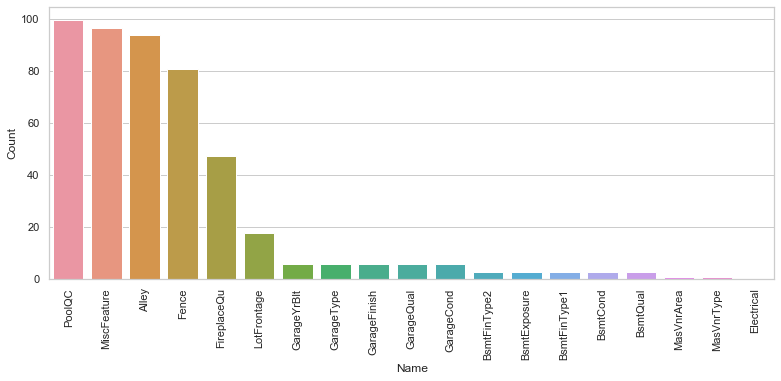

In [12]:
#Plot the null value distribution
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(data=IsNull,x='Name',y='Count')
plt.xticks(rotation = 90)
plt.show()

In [32]:
#Drop the independent variables with most null values
dataset.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)
dataset_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],inplace=True)

In [33]:
#Create a function to separate the categorical and numerical variables
missing_obj=[]
missing_float=[]
def varDatatype():
    for column in dataset.columns:
        if (dataset[column].isnull().sum())!=0:
            if(dataset[column].dtypes)==object:
                missing_obj.append(column)
            else:
                missing_float.append(column)

In [34]:
#Call the function
varDatatype()

In [35]:
#Null value imputation for Numerical variables
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
dataset[missing_float]=imp.fit_transform(dataset[missing_float])

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
#Null value imputation for Categorical variables
from sklearn.impute import SimpleImputer 
imp=SimpleImputer(strategy='most_frequent')
dataset[missing_obj]=imp.fit_transform(dataset[missing_obj])

In [40]:
#Check if any null values
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [43]:
###############Test dataset#############################
#Check for missing values in test dataset
dataset_test.columns[dataset_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [44]:
#Check the null value distribution in the test data
IsNull=dataset_test.isnull().sum()/len(dataset)*100
IsNull=IsNull[IsNull>0]
IsNull.sort_values(inplace=True,ascending=False)
IsNull=pd.DataFrame(IsNull)
IsNull.columns=['Count']
IsNull.index.names=['Name']
IsNull

,Count
Name,
LotFrontage,15.547945
GarageQual,5.342466
GarageFinish,5.342466
GarageYrBlt,5.342466
GarageCond,5.342466
GarageType,5.205479
BsmtCond,3.082192
BsmtExposure,3.013699
BsmtQual,3.013699


In [45]:
#Create a function to separate the categorical and numerical variables
missing_obj=[]
missing_float=[]
def varDatatype_Test():
    for column in dataset_test.columns:
        if (dataset_test[column].isnull().sum())!=0:
            if(dataset_test[column].dtypes)==object:
                missing_obj.append(column)
            else:
                missing_float.append(column)

In [46]:
#Call the function
varDatatype_Test()

In [47]:
#Null value imputation for Numerical variables
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
dataset_test[missing_float]=imp.fit_transform(dataset_test[missing_float])

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
#Null value imputation for Categorical variables
from sklearn.impute import SimpleImputer 
imp=SimpleImputer(strategy='most_frequent')
dataset_test[missing_obj]=imp.fit_transform(dataset_test[missing_obj])

In [51]:
#Check if any null values
dataset_test.columns[dataset_test.isnull().any()]

Index([], dtype='object')

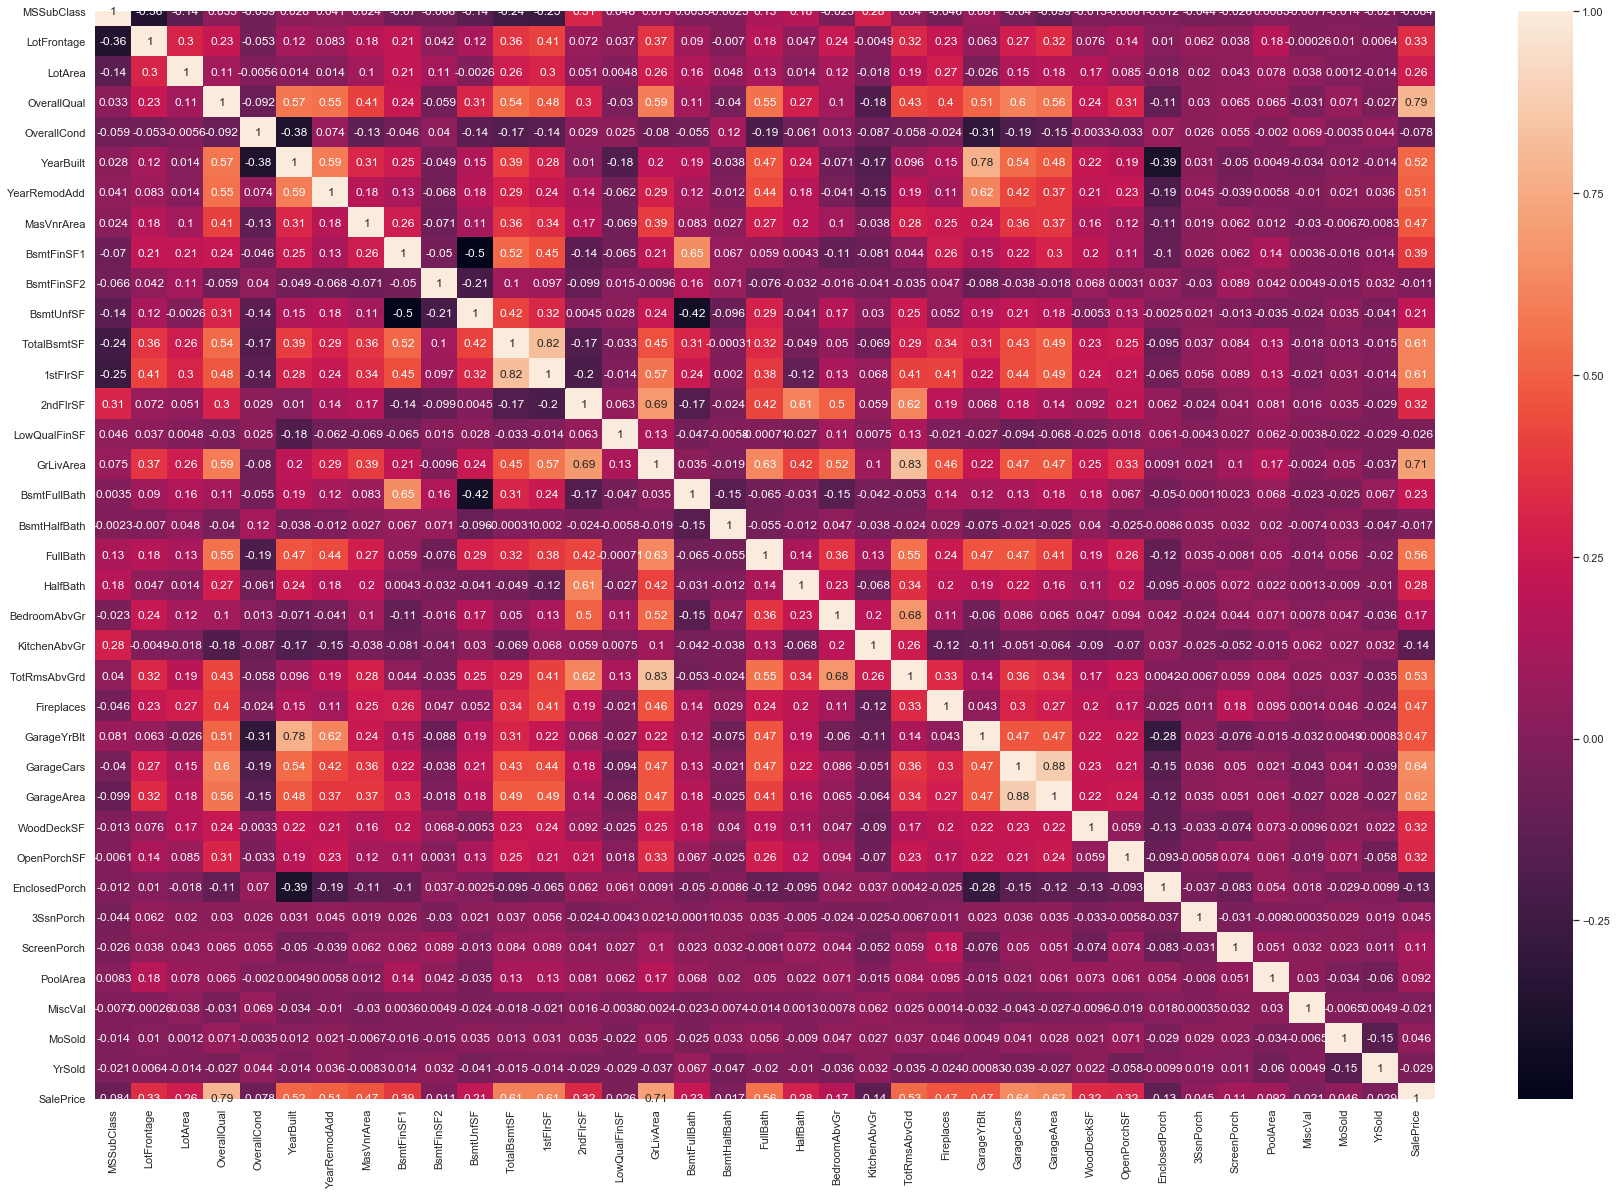

In [52]:
#Plot correlation for train dataset
corr=dataset.corr()
plt.subplots(figsize=(30,20))
sns.heatmap(corr,annot=True)
plt.show()

In [53]:
#Get the list of independent variables that has a higher correlation with the target
corr.index[abs(corr['SalePrice']>0.5)]

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [54]:
#Display the correlation values for the list of independent variables that has a higher correlation with the target
corr[abs(corr['SalePrice'])>0.5]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
TotalBsmtSF,-0.238518,0.363472,0.260833,0.537808,-0.171098,0.391452,0.291066,0.360067,0.522396,0.104810,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,-0.251758,0.413773,0.299475,0.476224,-0.144203,0.281986,0.240379,0.339850,0.445863,0.097117,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.074853,0.368007,0.263116,0.593007,-0.079686,0.199010,0.287389,0.388052,0.208171,-0.009640,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
FullBath,0.131608,0.180534,0.126031,0.550600,-0.194149,0.468271,0.439046,0.272999,0.058543,-0.076444,...,0.187703,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664
TotRmsAbvGrd,0.040380,0.320518,0.190015,0.427452,-0.057583,0.095589,0.191740,0.279568,0.044316,-0.035227,...,0.165984,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723
GarageCars,-0.040110,0.269539,0.154871,0.600671,-0.185758,0.537850,0.420622,0.361945,0.224054,-0.038264,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,-0.098672,0.323511,0.180403,0.562022,-0.151521,0.478954,0.371600,0.370884,0.296970,-0.018227,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431


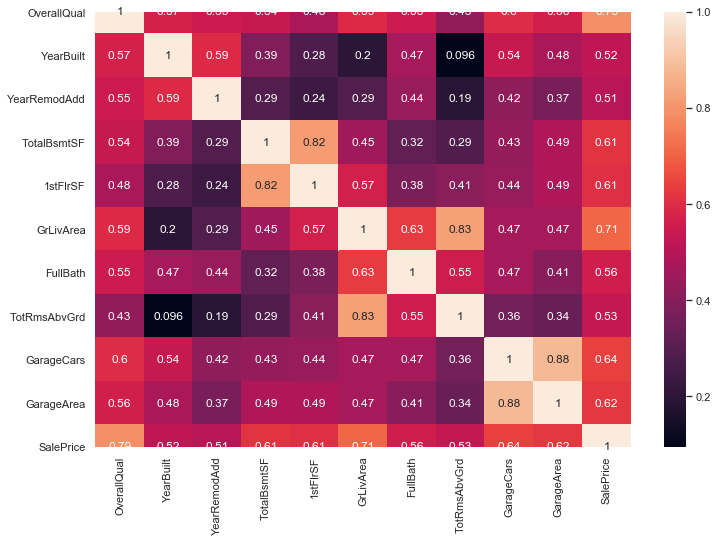

In [55]:
#View the correlation in a heatmap
top_feature=corr.index[abs(corr['SalePrice']>0.5)]

top_feature_dataset=dataset[top_feature].corr()
plt.subplots(figsize=(12,8))
sns.heatmap(dataset[top_feature].corr(),annot=True)
plt.show()

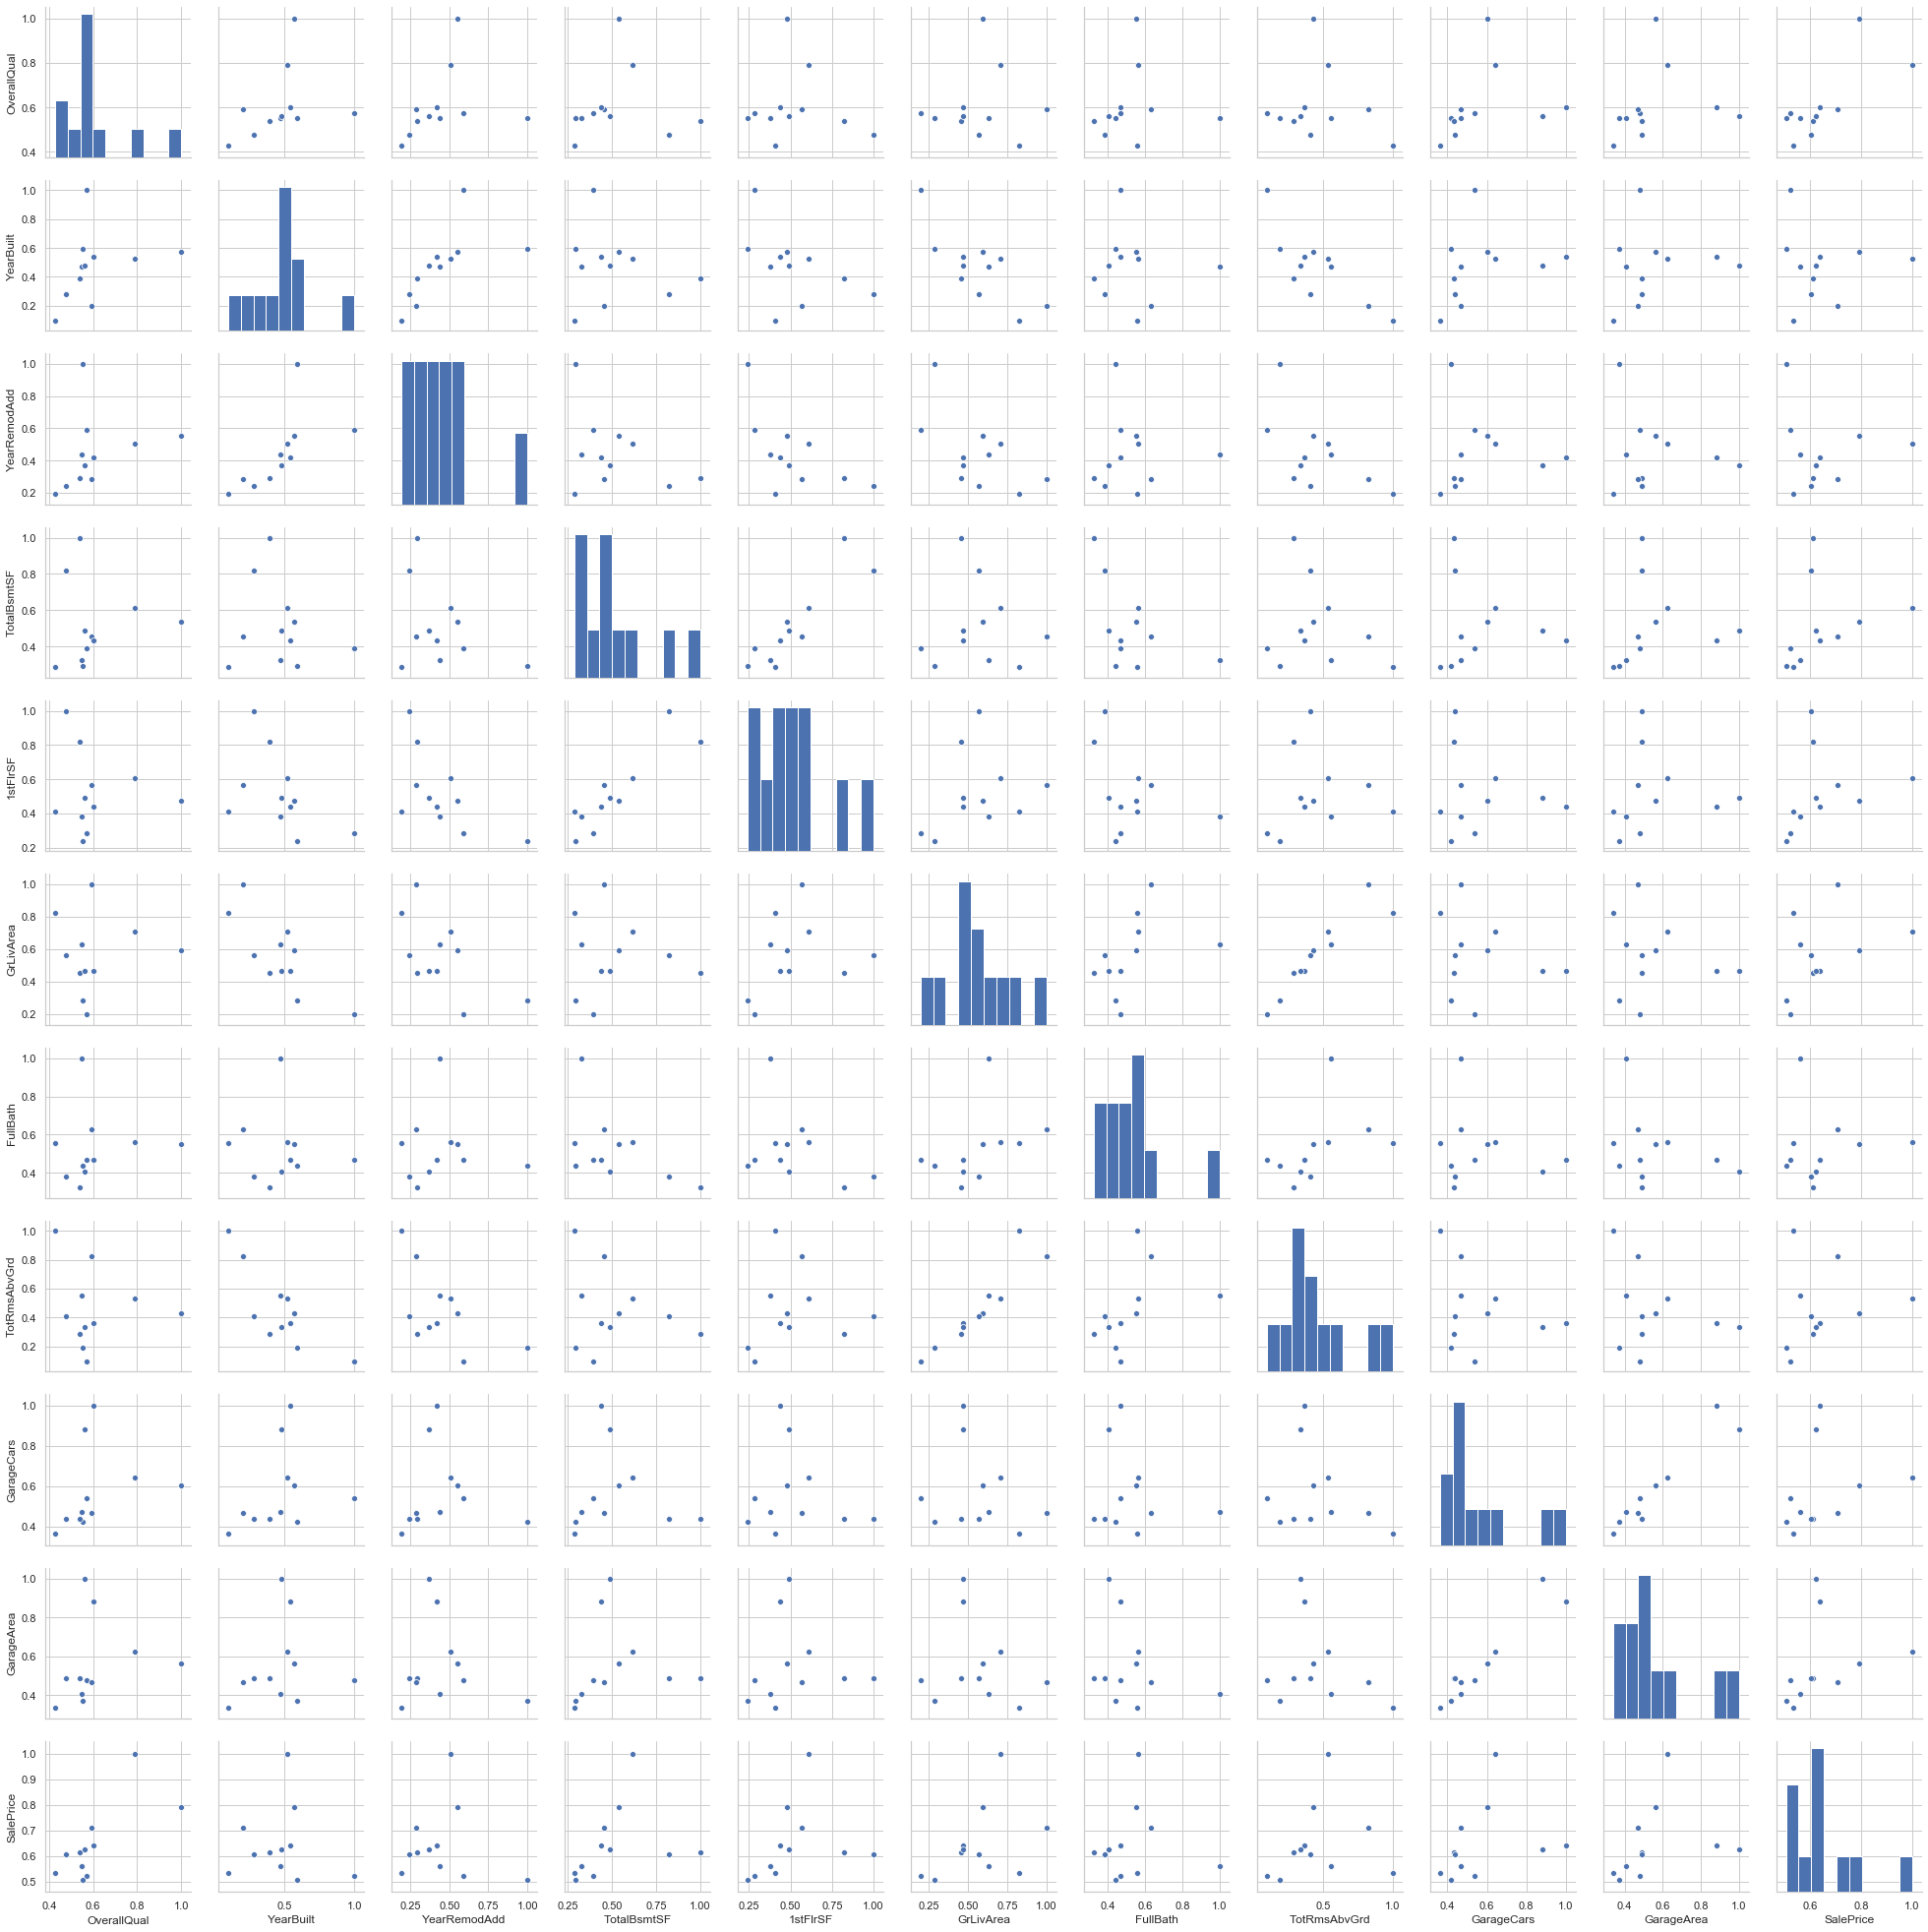

In [56]:
#Pairplot only for the highly correlated features
sns.pairplot(top_feature_dataset)

In [57]:
#Display in reverse order the correlated values
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

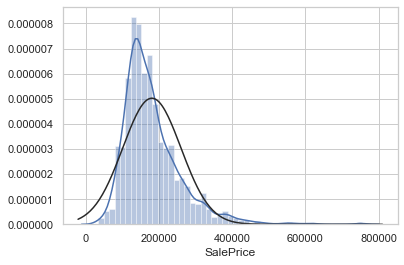

In [58]:
#View the distribution of the target variable
sns.distplot(dataset['SalePrice'],fit=stats.norm)

In [59]:
#Log transform the target variable to make it normal distribution
dataset['SalePrice']=np.log(dataset['SalePrice'])

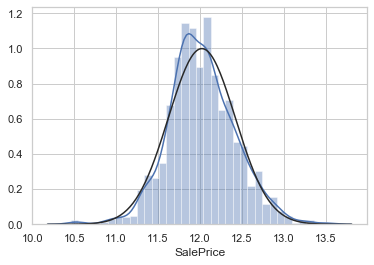

In [60]:
#View the distribution of the target variable after log transform
sns.distplot(dataset['SalePrice'],fit=stats.norm)

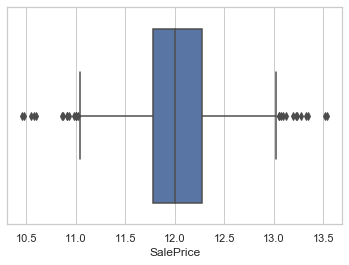

In [61]:
#Check to see if any outliers
sns.boxplot(x=dataset['SalePrice'])

In [62]:
#Get the list of categorical features
categorical_col = []
label_col = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10 and dataset[column].dtypes == object:
        categorical_col.append(column)
    elif dataset[column].dtypes == object:
        label_col.append(column)

In [176]:
#Concat train and test data
full_dataset=pd.concat([dataset,dataset_test],axis=0,sort=False)

In [177]:
#Check the shape of the combined dataset
print(full_dataset.shape)

(2919, 75)


In [178]:
#Perform one hot encoding for the list of categorical features
full_dataset = pd.get_dummies(full_dataset, columns=categorical_col + label_col,drop_first=True)

In [179]:
full_dataset.shape

(2919, 233)

In [71]:
full_dataset

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [188]:
#Split the train and test data separately from the combined dataset
df_train=full_dataset[full_dataset.SalePrice.notna()]
df_test=full_dataset[full_dataset.SalePrice.isna()]

In [190]:
print(df_train.shape,df_test.shape)

(1460, 233) (1459, 233)


In [191]:
#Make x and y and convert them to arrays
y=df_train['SalePrice'].values
x=df_train.drop(columns='SalePrice').values

In [192]:
print(x.shape,y.shape)

(1460, 232) (1460,)


In [193]:
#Split train and test data 70/30 split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [194]:
#Model building with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [195]:
#Check cross validation score
cross_val_score(model,x,y,cv=10)

array([0.49587711, 0.49687973, 0.91775169, 0.80187224, 0.89819676,
       0.77157054, 0.89964619, 0.9311127 , 0.57881139, 0.89746163])

In [196]:
#Check mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.03341071796832619

In [197]:
#Check rsquare value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8030564500556427

In [198]:
#Model building with Random Forest
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=350)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [199]:
#Check cross validation score
cv_rf=cross_val_score(model_rf,x,y,cv=10)

In [200]:
cv_rf.mean()

0.8743805920895337

In [201]:
#Check mean squared error
mean_squared_error(y_test,y_pred_rf)

0.018629933101548875

In [146]:
#Hyper parameter tuning for Random Forest using GridSearhCV
from sklearn.model_selection import GridSearchCV
params=[{'n_estimators':[50,100,150,200,250,300,350,400,450,500]}]
gridsearch=GridSearchCV(estimator=model_rf,param_grid=params,scoring='r2',n_jobs=-1,cv=10)
gridsearch=gridsearch.fit(x_train,y_train)

In [147]:
gridsearch.best_params_

{'n_estimators': 350}

In [148]:
gridsearch.best_score_

0.8523515678490335

In [202]:
#Predict the SalePrice with the test data
y_test=df_test.drop(columns='SalePrice').values
y_pred_rf=model_rf.predict(y_test)

In [ ]:
output=pd.read_csv('C:\\Neville\\Python\\Session\\Project\\House Price Prediction\\test.csv')

In [208]:
output['SalePrice']=pd.DataFrame(y_pred_rf)

In [210]:
output=output[['Id','SalePrice']]

In [211]:
#Kaggle submission
output.to_csv('C:\\Neville\\Python\\Session\\Project\\House Price Prediction\\submission.csv',index=False)